In [8]:
import dataGrab
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import scikitplot as skplt

In [20]:
cc_x, cc_y = dataGrab.getcc()
fruit_x, fruit_y = dataGrab.getFruit()
drug_x, drug_y = dataGrab.getDrugs()

[0.25592417 0.27043839 0.25244444]


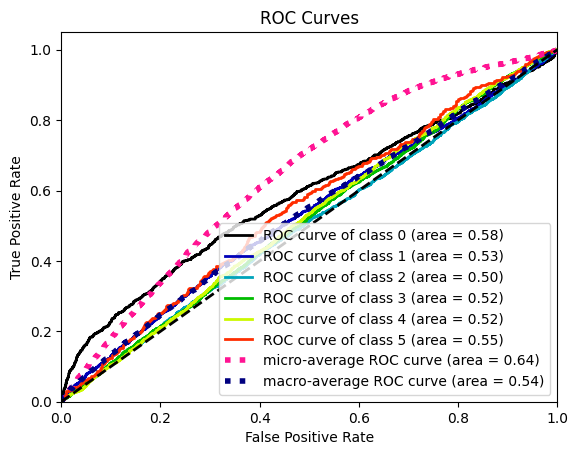

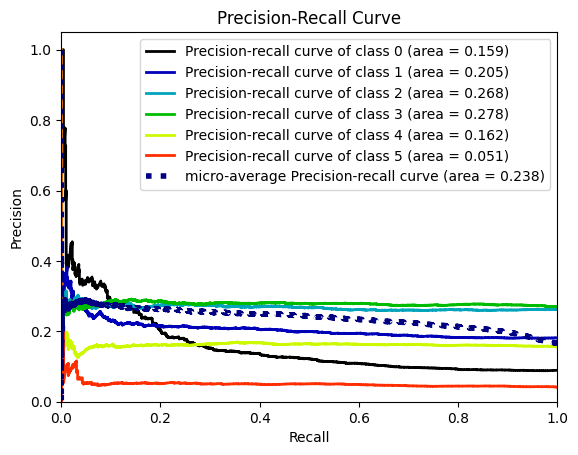

[0.86333333 0.89297659 0.8729097 ]


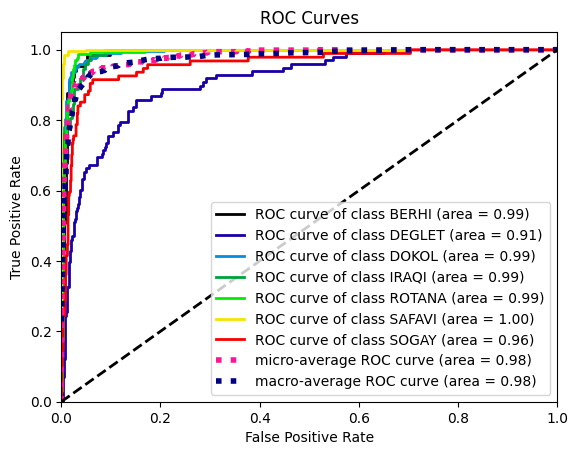

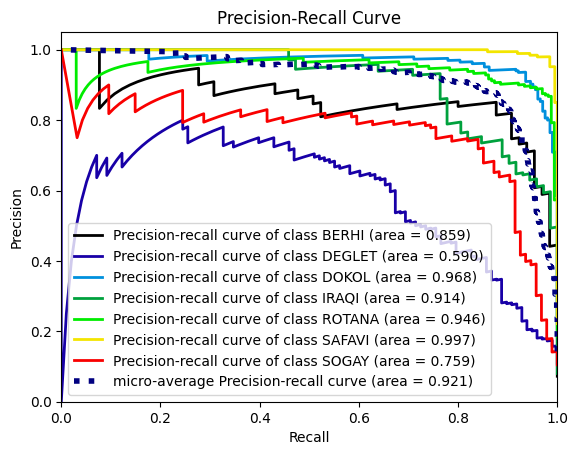

[0.91044776 0.92537313 0.95454545]


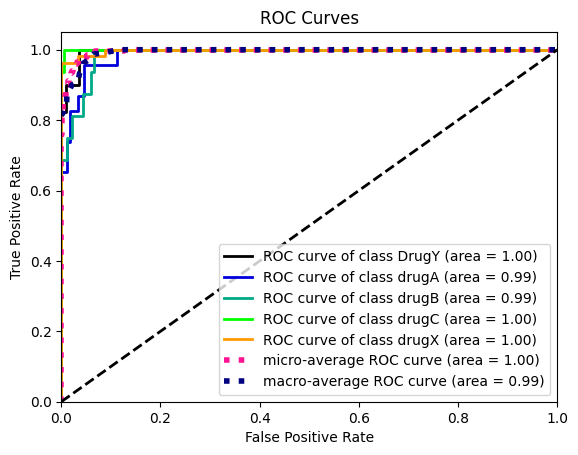

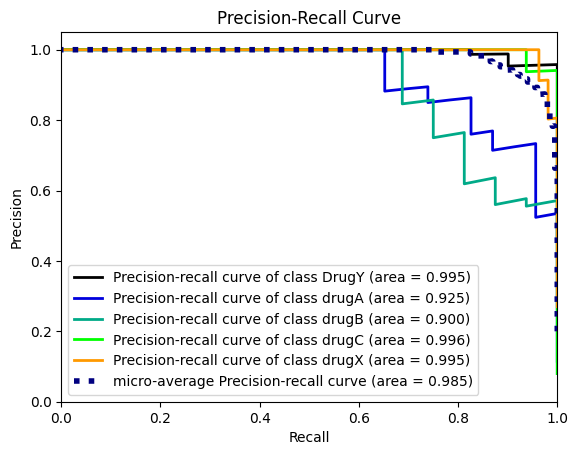

In [21]:
for i, j in [(cc_x, cc_y), (fruit_x, fruit_y), (drug_x, drug_y)]:
    sgd_clf = SGDClassifier(random_state=42, loss='log_loss')
    sgd_clf.fit(i, j)
    print(cross_val_score(sgd_clf, i, j, cv=3, scoring="accuracy"))
    y_probas = cross_val_predict(sgd_clf, i, j, cv=3, method="predict_proba")
    skplt.metrics.plot_roc(j, y_probas)
    plt.show()
    skplt.metrics.plot_precision_recall(j, y_probas)
    plt.show()

In [11]:
for i, j in [(cc_x, cc_y), (fruit_x, fruit_y), (drug_x, drug_y)]:
    km = KMeans(random_state=42, n_clusters=len(j.unique()), n_init=20)
    print(cross_val_score(km, i, j, cv=3, scoring="accuracy"))

[0.17861374 0.13122038 0.1602963 ]
[0. 0. 0.]
[0. 0. 0.]


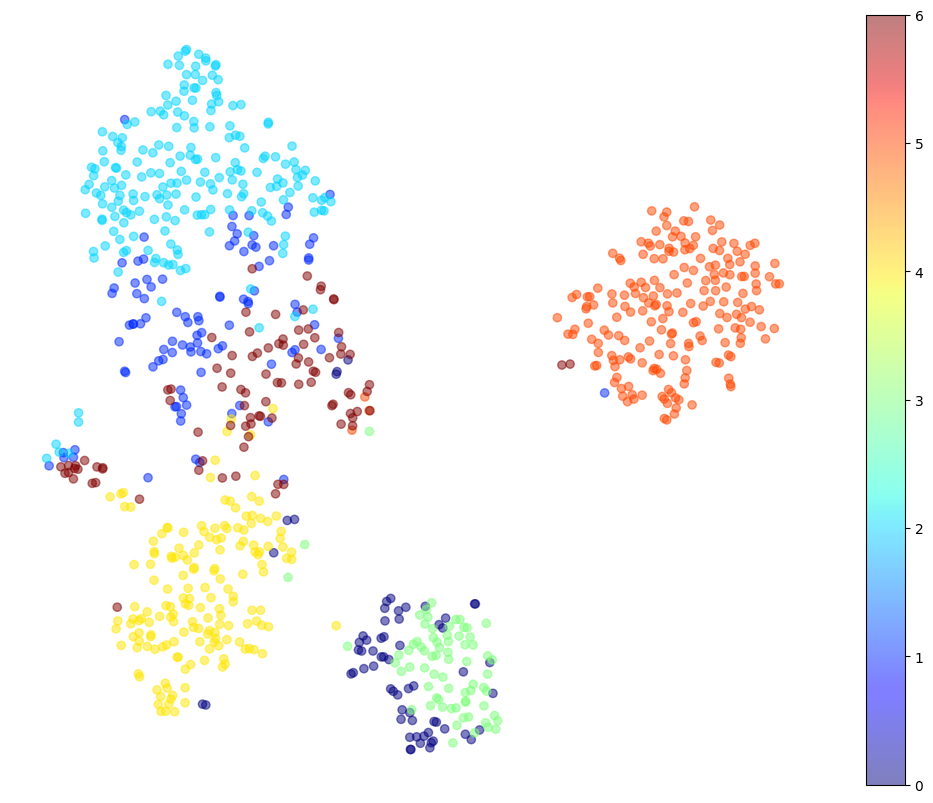

In [12]:
tsne = TSNE()
tsne.fit(fruit_x, fruit_y)

X_reduced = tsne.fit_transform(fruit_x)

w = pd.Series(fruit_y)
uList = list(fruit_y.unique())
for i in range(len(w)):
    w[i] = uList.index(fruit_y[i])

plt.figure(figsize=(13, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],
            c=w.astype(np.int8), cmap="jet", alpha=0.5)
plt.axis('off')
plt.colorbar()
plt.show()

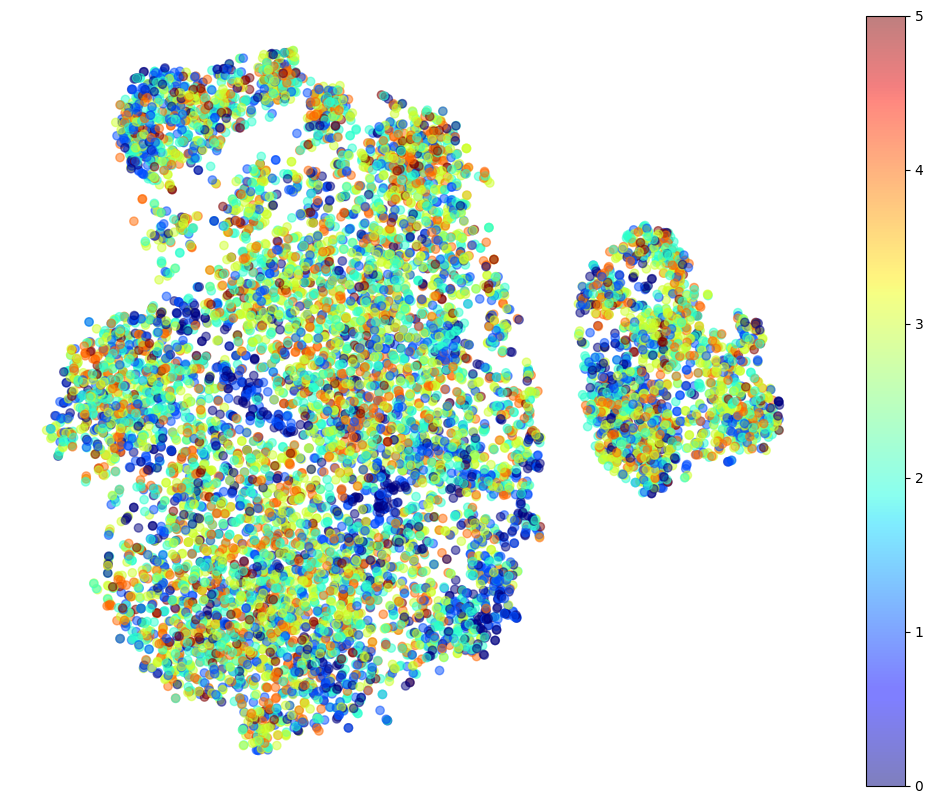

In [13]:
tsne = TSNE()
tsne.fit(cc_x, cc_y)

X_reduced = tsne.fit_transform(cc_x)

plt.figure(figsize=(13, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],
            c=cc_y.astype(np.int8), cmap="jet", alpha=0.5)
plt.axis('off')
plt.colorbar()
plt.show()

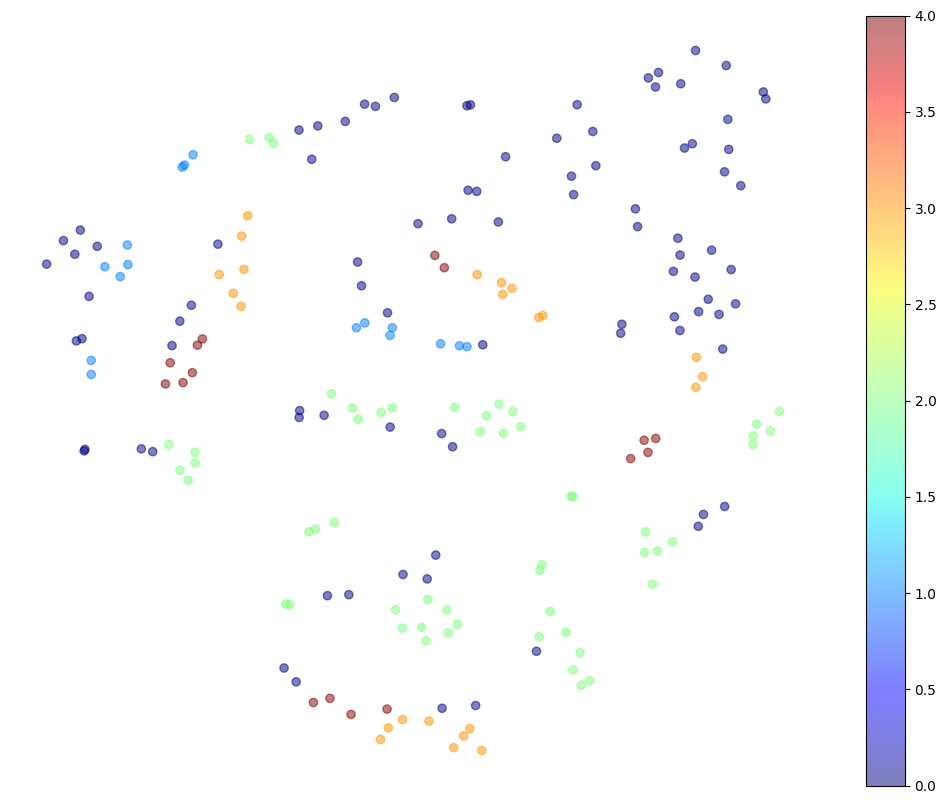

In [14]:
tsne = TSNE()
tsne.fit(drug_x, drug_y)

X_reduced = tsne.fit_transform(drug_x)

w = pd.Series(drug_y)
uList = list(drug_y.unique())
for i in range(len(w)):
    w[i] = uList.index(drug_y[i])

plt.figure(figsize=(13, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],
            c=w.astype(np.int8), cmap="jet", alpha=0.5)
plt.axis('off')
plt.colorbar()
plt.show()

[0.40077014 0.42950237 0.41333333]


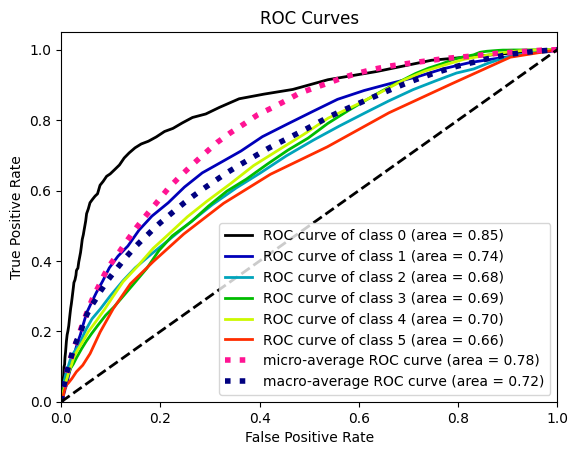

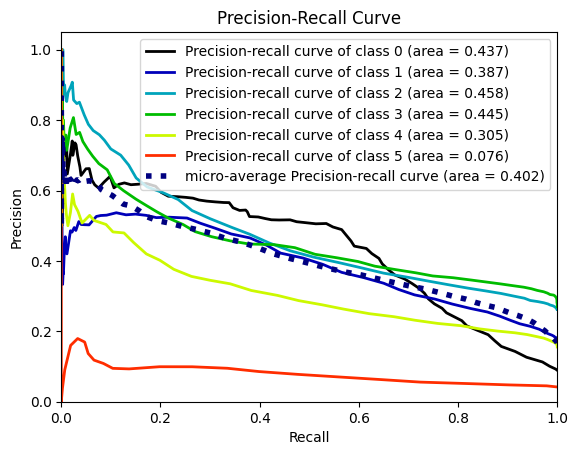

[0.87       0.87959866 0.85953177]


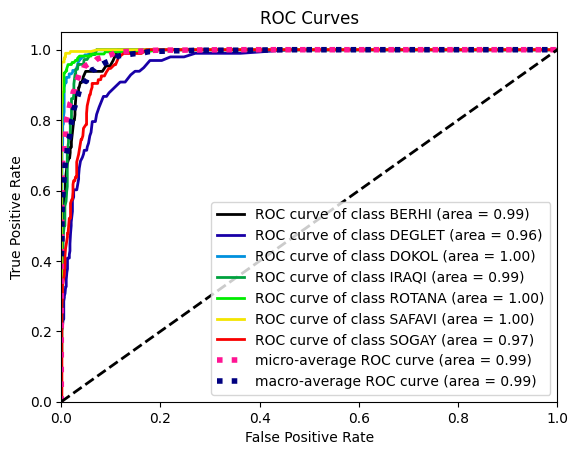

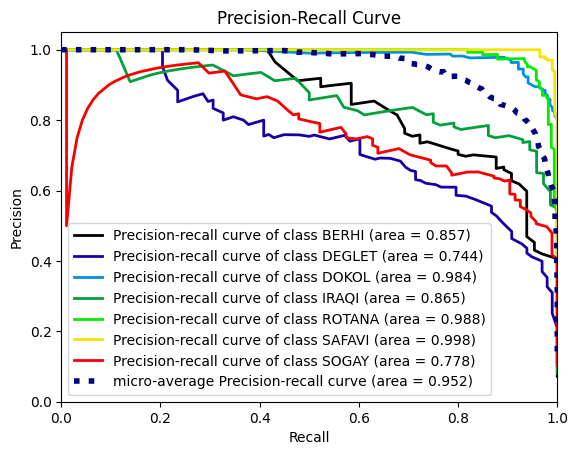

[1.         1.         0.96969697]


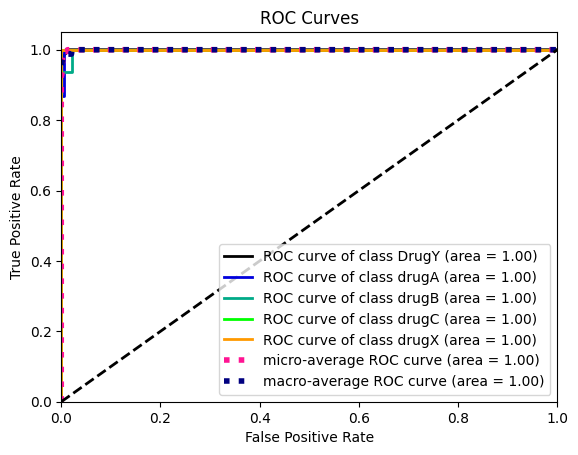

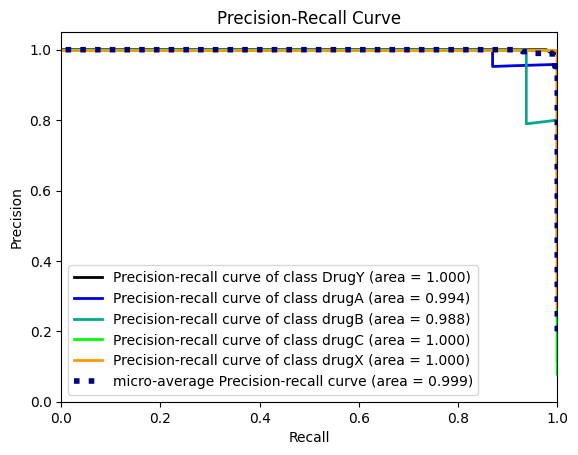

In [22]:
for i, j in [(cc_x, cc_y), (dataGrab.getFruit()), (dataGrab.getDrugs())]:
    rfc = RandomForestClassifier(random_state=42)
    rfc.fit(i, j)
    print(cross_val_score(rfc, i, j, cv=3, scoring="accuracy"))
    y_probas = cross_val_predict(rfc, i, j, cv=3, method="predict_proba")
    skplt.metrics.plot_roc(j, y_probas)
    plt.show()
    skplt.metrics.plot_precision_recall(j, y_probas)
    plt.show()

[0.35456161 0.37470379 0.32503704]


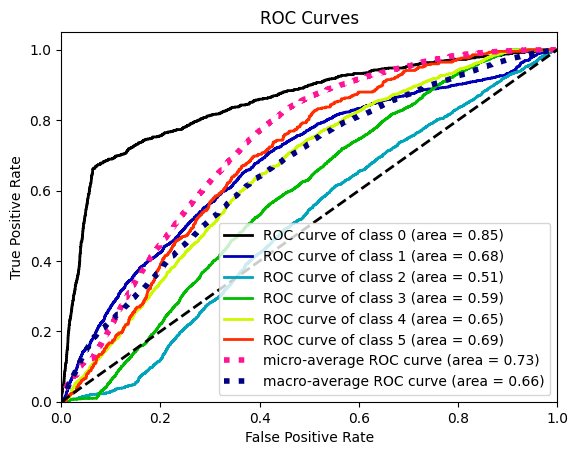

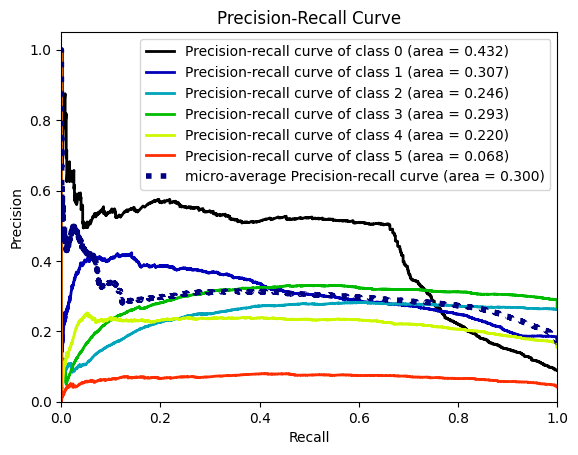

[0.3        0.65551839 0.63210702]


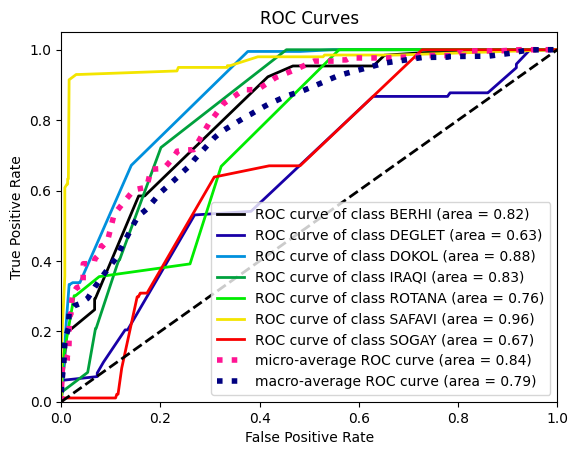

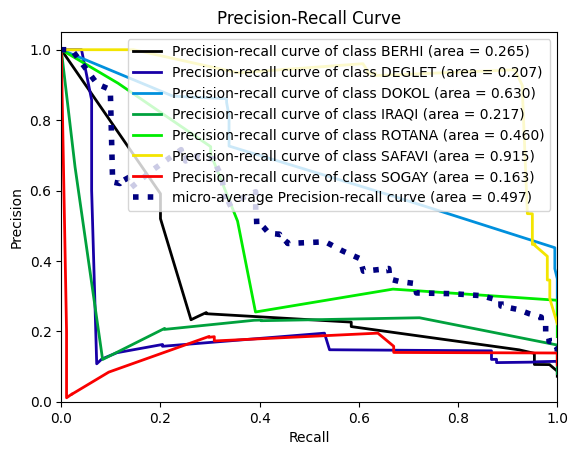

[0.85074627 0.82089552 0.83333333]


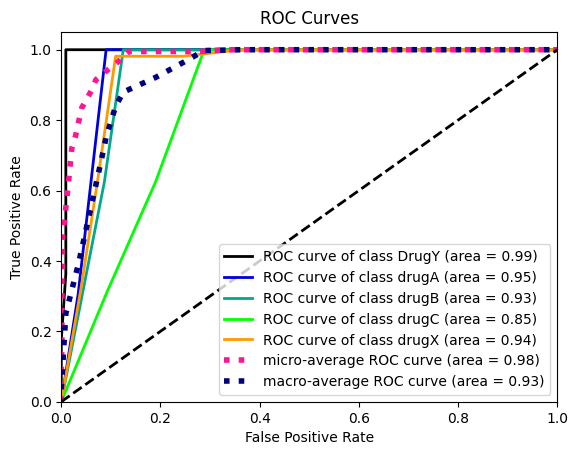

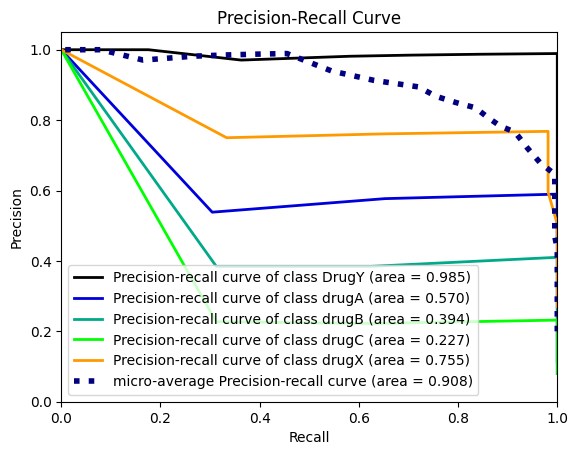

In [23]:
for i, j in [(cc_x, cc_y), (dataGrab.getFruit()), (dataGrab.getDrugs())]:
    ada = AdaBoostClassifier(random_state=42)
    ada.fit(i, j)
    print(cross_val_score(ada, i, j, cv=3, scoring="accuracy"))
    y_probas = cross_val_predict(ada, i, j, cv=3, method="predict_proba")
    skplt.metrics.plot_roc(j, y_probas)
    plt.show()
    skplt.metrics.plot_precision_recall(j, y_probas)
    plt.show()